<h1><center> Random Forest Training </center></h1>

# Pima Indians Diabetes Dataset

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

* Number of times pregnant.
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* Diastolic blood pressure (mm Hg).
* Triceps skinfold thickness (mm).
* 2-Hour serum insulin (mu U/ml).
* Body mass index (weight in kg/(height in m)^2).
* Diabetes pedigree function.
* Age (years).
* Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.

$\textbf{Goal:}$ Achieve an accuracy better than $77\%$.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/Diabete.csv")

In [3]:
data.head()

,times pregnant,glucose concentration,blood pressure,serum insulin,Triceps thickness,Body mass,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = data['Class']
x = data.drop('Class', axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=40)

# Vizualisation of a trained tree:

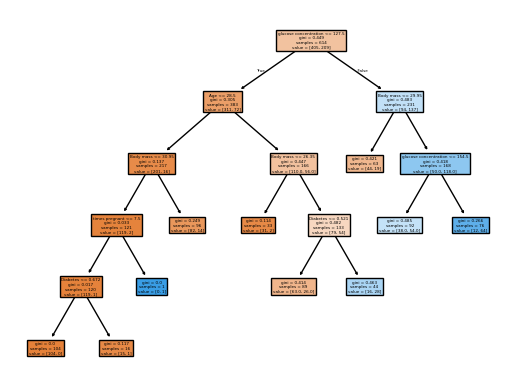

In [5]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(min_samples_split=100)
model_dt.fit(x_train, y_train)
plot_tree(model_dt,feature_names = list(data.columns[:-1]),filled=True);

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
plot_tree(model_dt,feature_names = list(data.columns[:-1]), filled=True)
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = model_dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

# Random Forest Training:

1) Train a random forest with $100$ estimators:

In [8]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

In [9]:
model_rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


2) Check the importance of variables in your model:

In [10]:
pd.DataFrame(model_rf.feature_importances_,
             index = x_train.columns, 
             columns = ["importance"]).sort_values(
    "importance", 
    ascending = False)

,importance
glucose concentration,0.247019
Body mass,0.155209
Age,0.135576
Diabetes,0.133339
times pregnant,0.097281
blood pressure,0.086980
Triceps thickness,0.074783
serum insulin,0.069813


3) Compute the accuracy of your model and the corresponding confusion matrix:

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
y_pred = model_rf.predict(x_test)
print(f"The accuracy score is : {accuracy_score(y_test, y_pred):.2%}")

The accuracy score is : 75.32%


In [13]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,86,9
1,29,30


4) Repeat the previous questions using Adaboost Classifier:

In [14]:
model_adaboost = AdaBoostClassifier(n_estimators=100)

In [15]:
model_adaboost.fit(x_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [17]:
pd.DataFrame(model_adaboost.feature_importances_,
             index = x_train.columns, 
             columns = ["importance"]).sort_values(
    "importance", 
    ascending = False)

,importance
glucose concentration,0.248534
Diabetes,0.242871
Age,0.176572
Body mass,0.160599
times pregnant,0.055435
Triceps thickness,0.052335
blood pressure,0.041691
serum insulin,0.021963


In [18]:
y_pred = model_adaboost.predict(x_test)
print(f"The accuracy score is : {accuracy_score(y_test, y_pred):.2%}")

The accuracy score is : 72.73%


In [19]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,83,12
1,30,29


# Improving performance through GridSearch:

In [20]:
from sklearn.model_selection import GridSearchCV


5) Using GridSeachCV, improve the performance of your Adaboost classifier through n_estimators and learning_rate:

In [21]:

parameters = {'n_estimators':[30,50,100],'learning_rate':[0.1,0.5,1.]}

clf = GridSearchCV(AdaBoostClassifier(), param_grid=parameters)
clf.fit(x_train, y_train)


,estimator,AdaBoostClassifier()
,param_grid,"{'learning_rate': [0.1, 0.5, ...], 'n_estimators': [30, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [22]:
clf.best_score_

0.7719978675196588

In [23]:
pd.DataFrame(clf.cv_results_,columns=["param_learning_rate","param_n_estimators","mean_test_score","std_test_score"])

,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,0.1,30,0.736132,0.032955
1,0.1,50,0.760549,0.020766
2,0.1,100,0.768759,0.025246
3,0.5,30,0.770345,0.027020
4,0.5,50,0.771998,0.024551
5,0.5,100,0.765507,0.024564
6,1.0,30,0.762242,0.025675
7,1.0,50,0.765507,0.035928
8,1.0,100,0.765507,0.024020


6) Compute the accuracy of the best tuned Adaboost model:

In [24]:
model_ada = AdaBoostClassifier(**clf.best_params_)
model_ada.fit(x_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,None


In [25]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7467532467532467